# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

boston = fetch_openml(data_id=42165)
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [3]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: MEDV, dtype: int64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<ipython-input-4-29d12d8fd8eb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


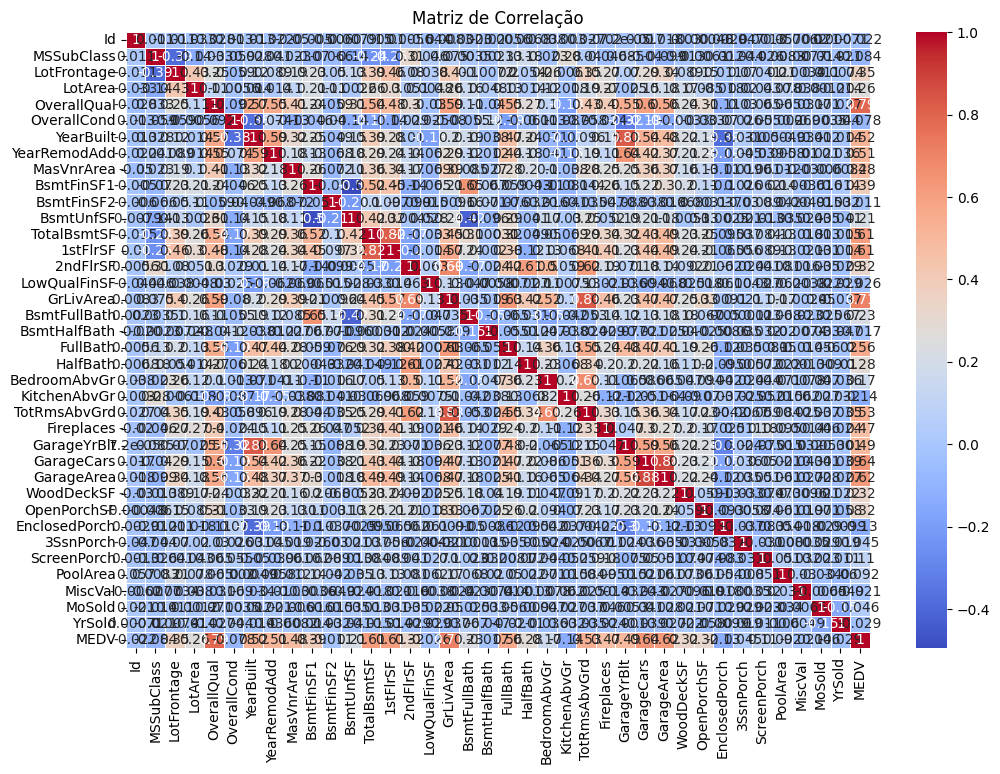

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title('Matriz de Correlação')
plt.show()


### 3. Separe os dados em validação e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

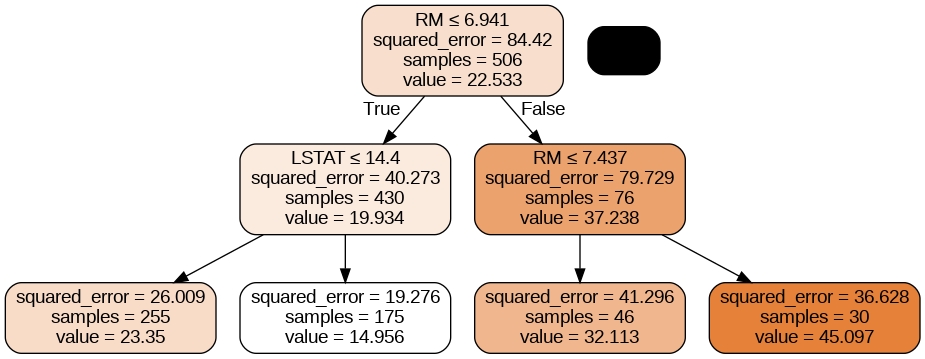

In [6]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Carregar nomes de recursos diretamente do conjunto de dados original
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

depths_to_try = [2, 8]

trees = {}
for depth in depths_to_try:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(data, target)
    trees[f'tree_depth_{depth}'] = tree

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

tree = trees['tree_depth_2']

# Crie um arquivo .dot com a representação da árvore
dot_data = export_graphviz(tree, filled=True, rounded=True, special_characters=True, feature_names=feature_names)

graph = graph_from_dot_data(dot_data)

# Exiba a visualização da árvore no Jupyter Notebook (ou outro ambiente que suporte o IPython)
Image(graph.create_png())


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)


mse_scores = {}

for depth in depths_to_try:
    tree = trees[f'tree_depth_{depth}']


    train_predictions = tree.predict(data_train)
    mse_train = mean_squared_error(target_train, train_predictions)


    test_predictions = tree.predict(data_test)
    mse_test = mean_squared_error(target_test, test_predictions)

    mse_scores[f'tree_depth_{depth}'] = {
        'MSE_train': mse_train,
        'MSE_test': mse_test
    }

mse_scores


{'tree_depth_2': {'MSE_train': 25.6794981123283,
  'MSE_test': 25.778561699952515},
 'tree_depth_8': {'MSE_train': 2.2444125603800744,
  'MSE_test': 1.4686730475911902}}

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 se ajusta melhor aos dados. Porém corre o risco de overfiting. Já a ávore com profundidade 2 é melhor se levar em consideração a questão do overfiting. Isso depende muito da abordagem.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

Para mim, parece a variável RM pois ela é usada nos primeiros níveis da árvore.